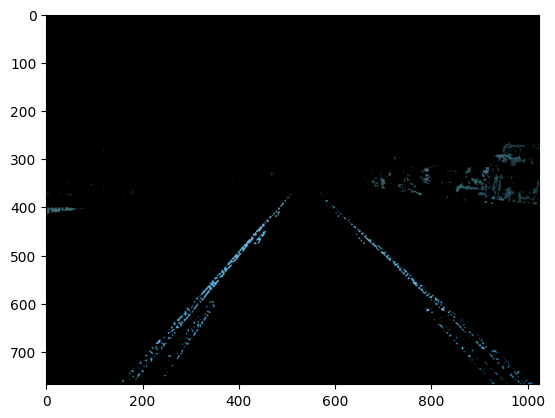

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

og_img = cv.imread("img.png")
hsv = cv.cvtColor(og_img, cv.COLOR_BGR2HSV)

# Define HSV range for yellow
# Hue for yellow ≈ 20–30, Saturation and Value should be high
lower_yellow = np.array([20, 100, 40])
upper_yellow = np.array([30, 255, 255])
# Create mask
mask = cv.inRange(hsv, lower_yellow, upper_yellow)
# Extract yellow parts
Yellow_region = cv.bitwise_and(og_img, og_img, mask=mask)

plt.imshow(Yellow_region)

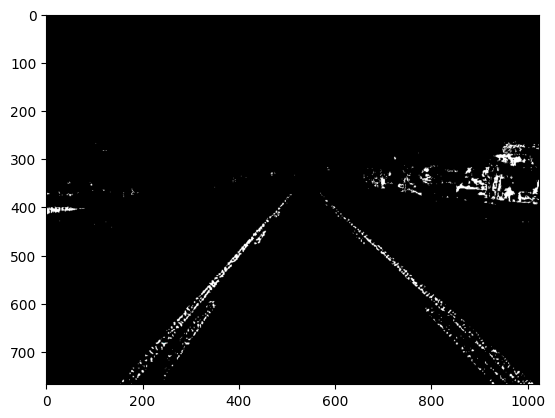

In [5]:
_, thresh = cv.threshold(Yellow_region, 0, 255, cv.THRESH_BINARY)
plt.imshow(thresh)

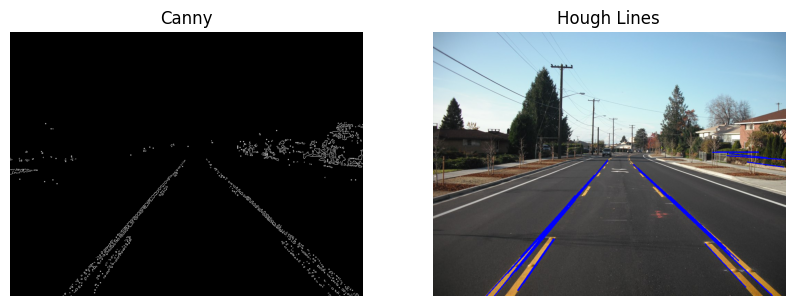

In [32]:
edges = cv.Canny(thresh, 50, 100)
lines = cv.HoughLinesP(edges, rho=1, theta=np.pi / 180,
                           threshold=50, minLineLength=100, maxLineGap=15)
out = og_img.copy()

if lines is not None:
    for l in lines:
        x1, y1, x2, y2 = l[0]
        cv.line(out, (x1, y1), (x2, y2), (255, 0, 0), 2)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(edges, cmap="gray")
plt.title("Canny")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(out, cv.COLOR_BGR2RGB))
plt.title("Hough Lines")
plt.axis("off")

plt.show()

# Data variance captured by Principal Components in PCA.